# Assignment 3: Linear Regression and Gradient Descent from the Ground Up

The goal of this assignment is to work through the fundamentals of Simple Linear Regression (one independent variable) with Mean Squared Error (average L2 loss) using Gradient Descent.

## Submission Instructions

- Please submit your notebook as a **Jupyter Notebook** on Canvas.
- **Due Date: Wednesday, October 22 at 6:59pm**. 
- **No late submissions** will be accepted for this assignment.

 ## Collaboration:



You are allowed to work with others on this assignment.

Please list the names of those you work with below.

Collaborators: Amy Tran

## Part 0 - Imports and CoW

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set Copy-on-Write
pd.options.mode.copy_on_write = True

## Part 1 : Linear Regression
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and we receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

Given $\vec{\hat{\beta}}=[1,2,1]$ and observation $x = [4, 2, 1]$,
The our equation becomes : 

$\hat{y}$ = 1(4) + 2(2) + 1(1)

$\hat{y}$ = 4 + 4 + 1 

$\hat{y}$ = 9

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

L2 = ($y_i$- $\hat{y}_i$)$^2$

L2 = (6.1 - 9)$^2$

L2 = (-2.9)$^2$

L2 = 8.41

## Part 2 : Gradient Descent with One Parameter

The following function generates the dataset you need for the rest of the questions

In [4]:
# This function helps generate a synthetic dataset based on a given slope value
def generate_dataset(slope, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = slope * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [5]:
# Example:
data = generate_dataset(slope=10)
data

,X,Y
0,0.515103,0.785660
1,0.596819,5.491852
2,0.837243,6.722274
3,0.557099,4.110181
4,0.552353,5.387770
...,...,...
95,0.916752,7.317991
96,0.364794,2.653995
97,0.045290,-1.664445
98,0.560216,2.918498


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of slope that the gradient descent algorithm can find in 100 iterations for initial slope=0.1 and $\alpha=0.01$. 

In [9]:
def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(slope, data):
    ''' Mean Squared Error Loss Function '''
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(slope, data):
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [ ]:
# so we have the data that has been generated, and we are trying to find line of best fit.
# we only have one param, x that is related to the target, y
# finding the best value of slope in 100 iterations will be to take a guess at slope, calculate the MSE, then take the derivative of the MSE, 
# and use gradient descent to decide how to adjust the param.

# we have:
# gradient descent function that returns an array of guesses given a derivative function, initial guess/start point, alpha/stepsize, n/total iterations
# mse_loss function that returns the MSE of y and yhat given the slope and the data after calculating the yhat
# mse_loss_derivative function that returns the derivative of the MSE between y and yhat given the slope and data after again calculating yhat 

# need to define the df function that the gradient_descent function takes as input.  It calls df(guess) and multiplies it by alpha.  
# It looks like that is setting the step size to the next step/ guess, so that is alpha* current slope 
def df(s):
    return mse_loss_derivative(s, data)

initial_guess = 0.1 #initial slope
alpha = 0.01
n = 100

# now plug that into the gradient_descent function with the given initial slope and alpha (so why do we have the mse_loss function? )
slope_values = gradient_descent(df, initial_guess, alpha, n)

# store the last value in the slope_values ( the value that the 100 iternations coverged on) as best_slope
best_slope = slope_values[-1]

# display value slopes converged to after 100 iterations
print(best_slope)



3.2709216681343998


### 2.b.

Now change the learning rate to be $\alpha=0.1$ and repeat 2.a


In [34]:
# assuming all variables carry through from the previous cell, we only need to change the learning rate:
# declaring new learning rate as alpha1
alpha1 = 0.1

# calculate slope values again, calling the new slop values calculcuated with alpha1 slope_values1
slope_values1 = gradient_descent(df, initial_guess, alpha1, n)

# store the last value in the slope_values at the new learning rate as best_slope1
best_slope1 = slope_values1[-1]

# display value slope_values1 converged to after 100 iterations
print(best_slope1)

7.145432347849983


### 2.c.
Create two plots showing the simple linear regression models you fitted on the observed data when you pick the slope using the gradient descent algorithm above. One plot for data with and one plot for data without an intercept. Each plot should include at least the following:
- A scatter plot of all the observed data
- Regression lines for the simple linear regression models 
- An appropriate title, a legend showing which line is which, and labels for both axes

*Q2C (Intended Meaning): Take the data generated (with_intercept=True) from 2A and 2B and plot the two lines that you fitted from 2A and 2B with the two different learning rates, plotted with a scatterplot of the data. Thats one plot.*

*Then generate a new dataset without an intercept (set with_intercept=False when you call generate_dataset) and do the same plot again; two lines, one for each learning rate. The lines you are fitting are still models with no "bias term" (no theta-zero).*

In [ ]:
# need plots for data with and without intercept, so need to generate the data without intercept and repeat the linear regression steps
# generate data without intercept
data_no_intercept = generate_dataset(slope=10, with_intercept=False)
data_no_intercept

# data with intercept is passed into df function
# define df1 function and pass in data_no_intercept
def df1(s):
    return mse_loss_derivative(s, data_no_intercept)

# calculate best slope with alpha/ learning rate .01 initial guess/ slope .10 n= 100 has not changed
# perform linear regression over 100 iterations
slope_values_no_intercept = gradient_descent(df1, initial_guess, alpha, n)

# store best slope for data with no intercept and .01 learning rate
best_slope_no_intercept = slope_values_no_intercept[-1]

# peek at slope for alpha learning rate with data with no intercept 
best_slope_no_intercept

np.float64(4.9909402585069556)

In [ ]:

# repeat with alpha1/ learning rate .1 
# perform linear regression over 100 iterations
slope_values1_no_intercept = gradient_descent(df1, initial_guess, alpha1, n)

# store best slope for data with no intercept and .1 learning rate
best_slope1_no_intercept = slope_values1_no_intercept[-1]

# peek at slope for alpha1 learning rate with data with no intercept 
best_slope1_no_intercept

np.float64(9.71041723327917)

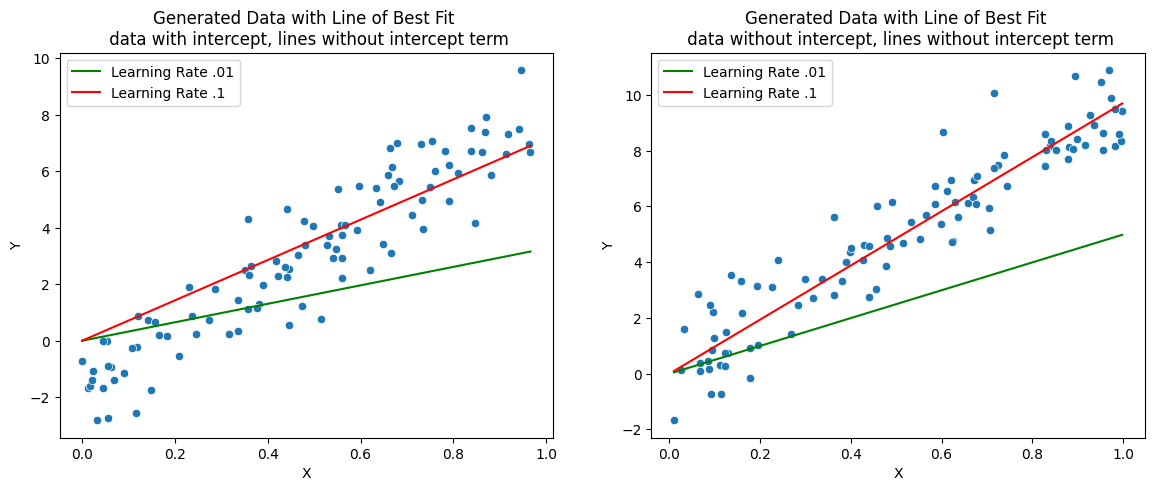

In [127]:
# graph results
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.scatterplot(data, x='X', y='Y').set(title = 'Generated Data with Line of Best Fit \n data with intercept, lines without intercept term' )
line = best_slope * data['X']
line = line.sort_values()
line1 = best_slope1 * data['X']
line1 = line1.sort_values()
data['X']
sns.lineplot(x = data['X'], y = line, color = 'green', label = 'Learning Rate .01')
sns.lineplot(x = data['X'], y = line1, color = 'red', label = 'Learning Rate .1')

plt.subplot(122)
sns.scatterplot(data_no_intercept, x='X', y='Y').set(title = 'Generated Data with Line of Best Fit \n data without intercept, lines without intercept term' )
line_no_intercept = best_slope_no_intercept * data_no_intercept['X']
lineno_intercept = line_no_intercept.sort_values()
line1_no_intercept = best_slope1_no_intercept * data_no_intercept['X']
line1_no_intercept = line1_no_intercept.sort_values()
data['X']
sns.lineplot(x = data_no_intercept['X'], y = line_no_intercept, color = 'green', label = 'Learning Rate .01')
sns.lineplot(x = data_no_intercept['X'], y = line1_no_intercept, color = 'red', label = 'Learning Rate .1')
plt.show()




### 2.d.
Which value of $\alpha$ resulted in a better model? Why?

In [ ]:
# for data generated with intercept
# mse loss for line with alpha/ learning rate .01
mse_data_alpha = mse_loss(best_slope, data)
# mse loss for line with alpha1/ learning rate .1
mse_data_alpha1 = mse_loss(best_slope1, data)
print(mse_data_alpha, " ", mse_data_alpha1)


# for data1 generated without intercept
# mse loss for line with alpha/ learning rate .01
mse_data1_alpha = mse_loss(best_slope_no_intercept, data_no_intercept)
# mse loss for line with alpha1/ learning rate .1
mse_data1_alpha1 = mse_loss(best_slope1_no_intercept, data_no_intercept)
print(mse_data1_alpha, " ", mse_data1_alpha1)

6.383564557897712   1.8413113180270322


The value $\alpha$ = .1 resulted in the better model.

The higher $\alpha$ / learning rate resulted in a better model because it was taking larger "steps" between iterations, so it was able to make more progress towards convergence in the same number of steps. 

## Part 3 : Gradient Descent with 1-2 parameters

### 3.a. 
Problem 2 did not include an intercept term (or "bias" term). Write a function calculate_y_hat(X, Y, with_intercept) that computes the value of y_hat for your model using either one or two parameters (slope and intercept or just slope) based on whether or not an intercept term is specified within the model. The argument with_intercept should be a boolean.

Hint: Use sklearn.linear_model.LinearRegression library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# def calculate_y_hat(X, Y, with_intercept):
    # Your code here

### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. State your choice of learning rate. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

*Q3B: The statement to give the learning rate that you use is a typo. Ignore it.*